In [4]:
pip install openpyxl


  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [9]:
df = pd.read_excel("Telco_customer_churn.xlsx")  
print("Columns in the dataset:", df.columns)

Columns in the dataset: Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')


In [10]:
df.drop(['CustomerID', 'Churn Label', 'Churn Score', 'Churn Reason'], axis=1, inplace=True)


In [15]:
df.head()

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
0,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239
1,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701
2,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,5372
3,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,5003
4,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,5340


In [11]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df.dropna(inplace=True) 

In [12]:
df['Churn Value'] = df['Churn Value'].map({1: 1, 0: 0})

In [14]:
X = df.drop('Churn Value', axis=1)
y = df['Churn Value']


In [16]:
X = pd.get_dummies(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print(X_train, X_test, y_train, y_test)                                               

[[ 0.          1.15845758  0.94602986 ...  1.90349    -0.71186341
  -0.54360352]
 [ 0.         -0.68995609 -1.05999007 ... -0.5253508   1.40476387
  -0.54360352]
 [ 0.         -1.85593628 -0.9617594  ...  1.90349    -0.71186341
  -0.54360352]
 ...
 [ 0.          0.07771456  0.14346993 ...  1.90349    -0.71186341
  -0.54360352]
 [ 0.          0.52856023  0.69087499 ... -0.5253508  -0.71186341
   1.83957601]
 [ 0.          1.30051954  1.14656419 ... -0.5253508   1.40476387
  -0.54360352]] [[ 0.          0.55161179  0.58609653 ...  1.90349    -0.71186341
  -0.54360352]
 [ 0.         -0.26805888 -0.6930122  ... -0.5253508  -0.71186341
  -0.54360352]
 [ 0.          0.55911695  0.54970889 ... -0.5253508  -0.71186341
   1.83957601]
 ...
 [ 0.          0.81858105  0.43482555 ... -0.5253508  -0.71186341
   1.83957601]
 [ 0.          0.86200376  0.44940773 ... -0.5253508  -0.71186341
   1.83957601]
 [ 0.         -0.64814162 -0.81611803 ...  1.90349    -0.71186341
  -0.54360352]] 2907    0
7014  

In [23]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
print("model:",model)

model: <Sequential name=sequential_2, built=True>


In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
print("\nTraining model...")
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, verbose=0)


Training model...


In [27]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)
print("y_pred_probs:",y_pred_probs)
print("y_pred:",y_pred)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
y_pred_probs: [[1.5212682e-06]
 [1.9922755e-04]
 [2.8212229e-04]
 ...
 [3.6563849e-04]
 [9.3842700e-02]
 [2.0947928e-05]]
y_pred: [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [28]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n🔹 Test Accuracy: {acc:.4f}")



🔹 Test Accuracy: 0.7377


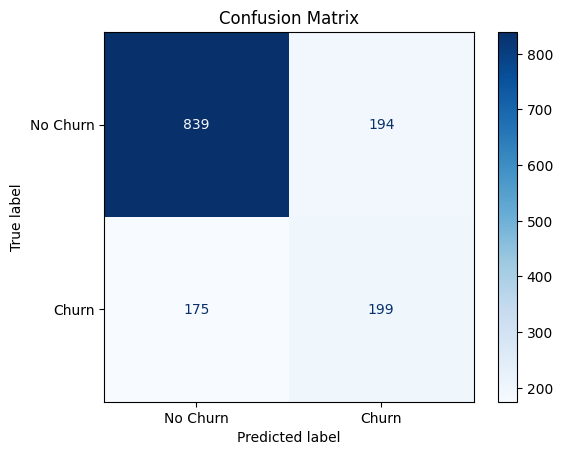

In [30]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

D:\folder desktop\New folder (2)\env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


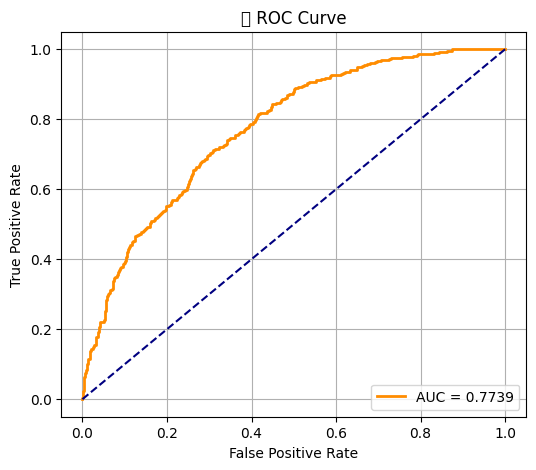

In [32]:

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.4f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('🔹 ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

